## Importing required library

In [1]:
import pandas as pd
import sqlite3
facts=sqlite3.connect('factbook.db')
query="SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query,facts)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [2]:
min_pop="SELECT MIN(population),name FROM facts"
max_pop="SELECT MAX(population),name FROM facts"
min_pop_grow="SELECT MIN(population_growth),name FROM facts"
max_pop_grow="SELECT MAX(population_growth),name FROM facts"
pop="SELECT MIN(population),MIN(population_growth),MAX(population),MAX(population_growth) FROM facts"

In [3]:
pd.read_sql_query(min_pop,facts)

,MIN(population),name
0,0,Antarctica


In [4]:
pd.read_sql_query(max_pop,facts)

,MAX(population),name
0,7256490011,World


In [5]:
pd.read_sql_query(max_pop_grow,facts)

,MAX(population_growth),name
0,4.02,South Sudan


In [6]:
pd.read_sql_query(min_pop_grow,facts)

,MIN(population_growth),name
0,0.0,Holy See (Vatican City)


In [7]:
pd.read_sql_query(pop,facts)

,MIN(population),MIN(population_growth),MAX(population),MAX(population_growth)
0,0,0.0,7256490011,4.02


In [8]:
#Write a query that returns the countrie(s) with a population of 0.
#Write a query that returns the countrie(s) with a population of 7256490011.
#In a markdown cell, type up your observations on these rows.

In [9]:
pop0="SELECT * FROM facts WHERE population =(SELECT MIN(population) FROM facts)"

In [10]:
pd.read_sql_query(pop0,facts)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [11]:
pop1="SELECT * FROM facts WHERE population =(SELECT MAX(population) FROM facts)"

In [12]:
pd.read_sql_query(pop1,facts)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


## Importing Libraries for creating Histogram

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45d9e89470>,
      dtype=object)

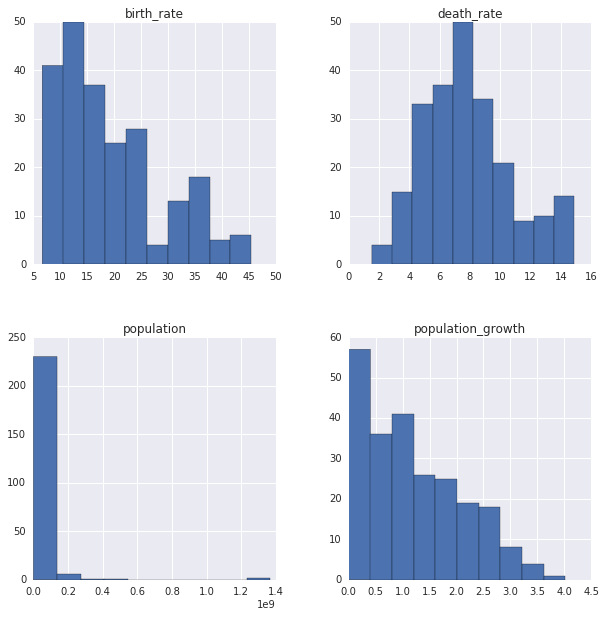

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
q='''SELECT population,population_growth,birth_rate,death_rate FROM facts
WHERE population != (SELECT MAX(population) FROM facts)
AND population !=(SELECT MIN(population) FROM facts)'''
pd.read_sql_query(q,facts).hist(ax=ax)

In [14]:
pop_den='''
SELECT CAST(population AS float)/CAST(area AS float) Density,Name
FROM facts
ORDER BY 1 DESC
LIMIT 20'''

In [15]:
pd.read_sql_query(pop_den,facts)

,Density,name
0,21168.964286,Macau
1,15267.500000,Monaco
2,8141.279770,Singapore
3,6445.041516,Hong Kong
4,5191.819444,Gaza Strip
5,4876.333333,Gibraltar
6,1771.859211,Bahrain
7,1319.640940,Maldives
8,1310.015823,Malta
9,1299.925926,Bermuda


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45e3927940>],
      dtype=object)

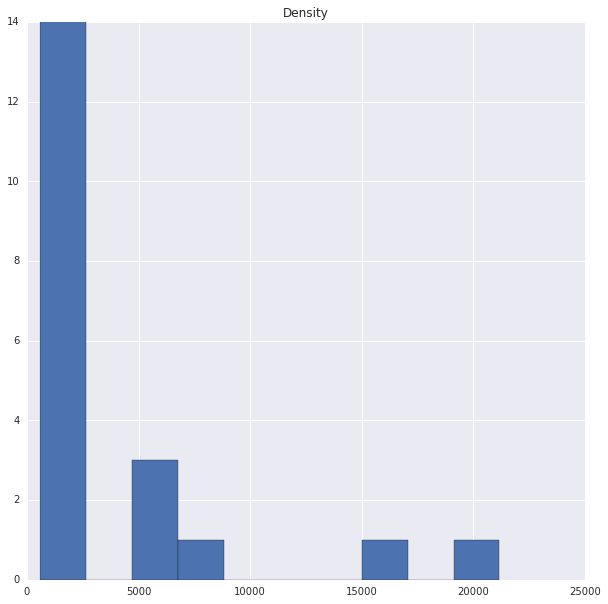

In [16]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_title('Population Density')
pd.read_sql_query(pop_den,facts).hist(ax=ax)

In [17]:
p1='SELECT CAST(area_water as float)/CAST(area_land as float) water_density, name FROM facts ORDER BY water_density DESC LIMIT 5'
pd.read_sql_query(p1,facts)

,water_density,name
0,905.666667,British Indian Ocean Territory
1,4.520231,Virgin Islands
2,0.554791,Puerto Rico
3,0.386613,"Bahamas, The"
4,0.284673,Guinea-Bissau


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45d79b2ef0>],
      dtype=object)

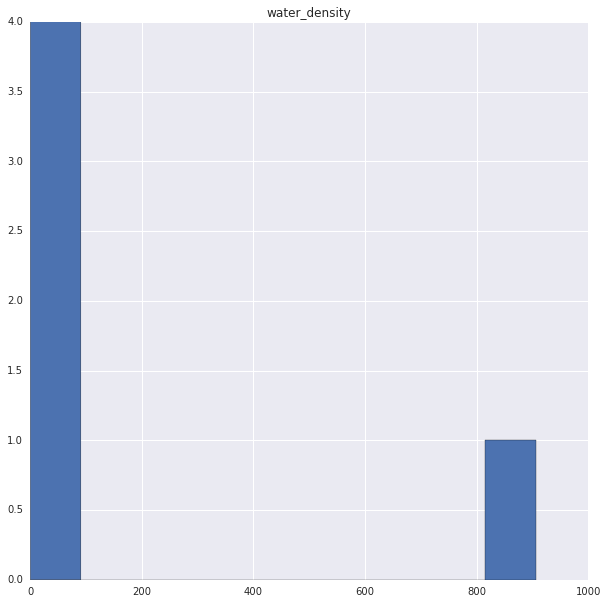

In [18]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_title('Water_density')
pd.read_sql_query(p1,facts).hist(ax=ax)